In [1]:
import collections
import numpy as np
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
from pathlib import Path

pgf_with_custom_preamble = {
    "text.usetex": False,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
        '\\usepackage[T1]{fontenc}'
     ]
}


sns.set_style('ticks')
sns.set_context('poster')
sns.set_palette('Set2', 25)

colors = sns.color_palette('Set2', 20)

from scipy import interpolate

# No Water

In [2]:
no_water_loops = collections.defaultdict(list)
no_water_path = Path('no_water')
for f in no_water_path.iterdir():
    if 'loops_hist' in f.name:
        k = float(f.name.split('_')[3])
        with f.open('rb') as iv:
            d = pickle.load(iv)
            no_water_loops[k].extend(d[-1])

# With water

In [3]:
water_loops = collections.defaultdict(list)
water_path = Path('with_water')
for f in water_path.iterdir():
    if 'loops_hist' in f.name:
        k = float(f.name.split('_')[3])
        with f.open('rb') as iv:
            d = pickle.load(iv)
            water_loops[k].extend(d[-1])

# Water rev

In [4]:
water_rev_loops = collections.defaultdict(list)
water_rev_path = Path('with_water_rev')
for f in water_rev_path.iterdir():
    if 'loops_hist' in f.name and 'rt1' in f.name:
        k = float(f.name.split('_')[3])
        kr = float(f.name.split('_')[4])
        if kr != 0.001:
            continue
        print(k,kr)
        with f.open('rb') as iv:
            d = pickle.load(iv)
            water_rev_loops[k].extend(d[-1])
            print(k, d[-1])

0.1 0.001
0.1 [6, 6, 6, 4, 4]
0.1 0.001
0.1 [6, 6, 6, 6]
0.001 0.001
0.001 []
0.1 0.001
0.1 [8, 6, 14, 6]
0.01 0.001
0.01 [10, 4]
0.01 0.001
0.01 [8, 4]
0.001 0.001
0.001 []
0.01 0.001
0.01 [8]
0.001 0.001
0.001 []
0.001 0.001
0.001 []
0.01 0.001
0.01 [4, 4, 6]
0.1 0.001
0.1 [4, 6, 4, 4, 6]
0.1 0.001
0.1 [8, 10, 4, 6, 6, 6, 6, 8, 6]


In [5]:
matplotlib

<module 'matplotlib' from '/home/teodor/.local/lib/python3.5/site-packages/matplotlib/__init__.py'>

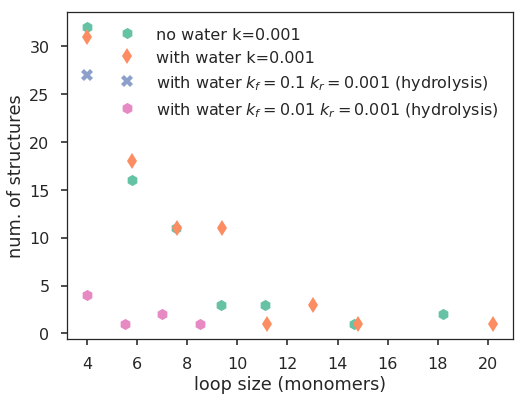

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
markers = {0.001: '*', 0.01: 'h', 0.1: 'X'}
for k in no_water_loops:
    if no_water_loops[k]:
        n, x = np.histogram(no_water_loops[k], density=False, bins='auto')
        n = np.asarray(n, np.float)
        n[n <= 0.0001] = np.nan
        plt.plot(x[:-1], n, 'h', linestyle='None', label='no water k={}'.format(k))

for k in water_loops:
    if water_loops[k]:
        n, x = np.histogram(water_loops[k], density=False, bins='auto')
        n = np.asarray(n, np.float)
        n[n <= 0.0001] = np.nan
        plt.plot(x[:-1], n, 'd', linestyle='None', label='with water k={}'.format(k))
        
for k in water_rev_loops:
    if water_rev_loops[k]:
        n, x = np.histogram(water_rev_loops[k], density=False, bins='auto')
        n = np.asarray(n, np.float)
        n[n <= 0.0001] = np.nan
        plt.plot(x[:-1], n, markers[k], linestyle='None', label='with water $k_f={}$ $k_r=0.001$ (hydrolysis)'.format(k))
        
plt.legend()
plt.xlabel('loop size (monomers)')
plt.ylabel('num. of structures')
plt.savefig('hist_loops.pdf', dpi=200, tight_layout=True)